In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import os

In [46]:
# data directory
data_dir = 'cell_images/'

In [47]:
os.listdir(data_dir)

['test', 'train']

In [48]:
test_path = data_dir+'test/'
train_path = data_dir+'train/'

In [49]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [50]:
os.listdir(test_path+'/parasitized')[0] # example image

'C100P61ThinF_IMG_20150918_144348_cell_144.png'

In [51]:
para_cell = test_path+'/parasitized/'+os.listdir(test_path+'/parasitized')[0]

In [52]:
imread(para_cell).shape # image shape, it's a colored image with 3 channels

(136, 133, 3)

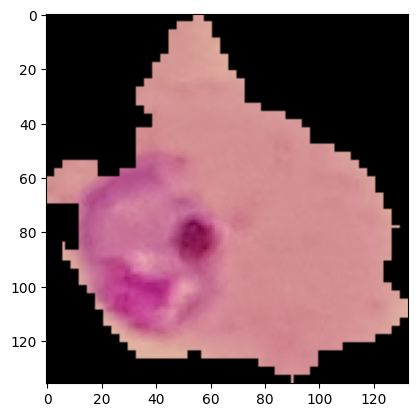

In [53]:
plt.imshow(imread(para_cell)) # show the image, the parasite is the purple thing inside the red blood cell

In [54]:
unifec_cell = test_path+'/uninfected/'+os.listdir(test_path+'/uninfected')[0]

In [55]:
unifec_cell = imread(unifec_cell)

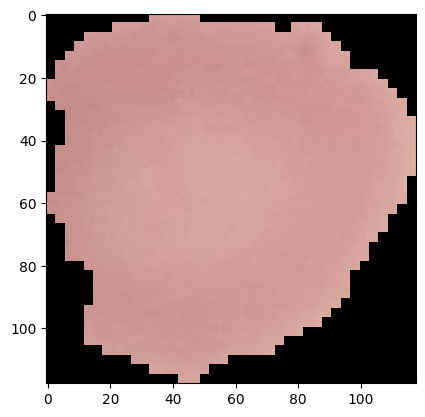

In [56]:
plt.imshow(unifec_cell) # show the image, this is an healthy cell

In [57]:
dim1 = [] 
dim2 = []

# check the dimensions of all images
for image_filename in os.listdir(test_path+'/uninfected'):
        
        img = imread(test_path+'/uninfected/'+image_filename) 
        d1,d2,colors = img.shape # get the dimensions
        dim1.append(d1) # append the dimensions
        dim2.append(d2) # append the dimensions
        

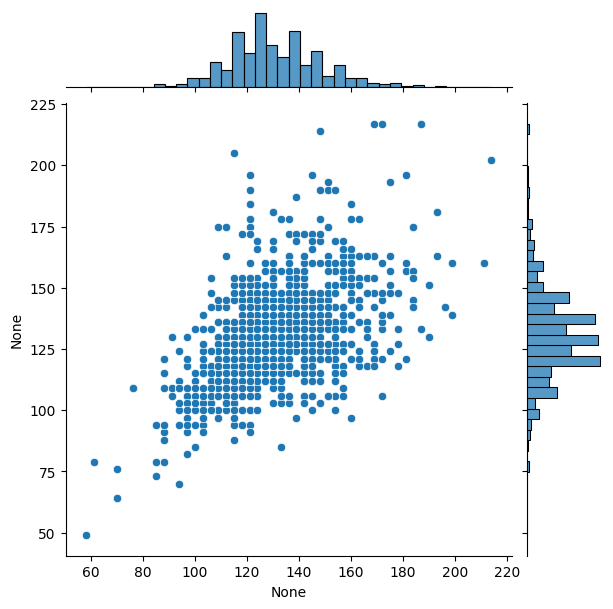

In [58]:
sns.jointplot(x=dim1,y=dim2) # the plot shows that the images have different dimensions

In [59]:
print(np.mean(dim1)) # average dimension 130
print(np.mean(dim2)) # average dimension 130
# we will resize the images to 130x130

130.92538461538462
130.75


In [60]:
image_shape = (130,130,3)

In [61]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [62]:
image_gen = ImageDataGenerator(rotation_range=20, width_shift_range=0.1, height_shift_range=0.1, rescale=1/255, shear_range=0.1, zoom_range=0.1, horizontal_flip=True, fill_mode='nearest')

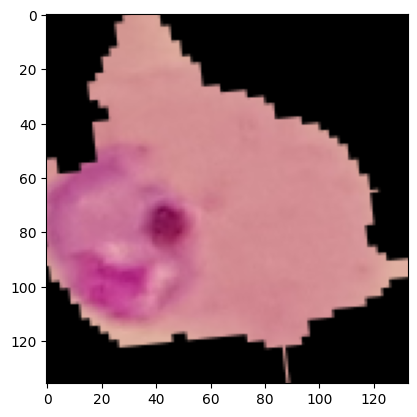

In [63]:
para_cell = imread(para_cell)
plt.imshow(image_gen.random_transform(para_cell)) # example of a transformed image

In [64]:
image_gen.flow_from_directory(train_path) # flow from directory
# 2 classes, parasitized and uninfected

Found 24958 images belonging to 2 classes.


In [65]:
image_gen.flow_from_directory(test_path) # flow from directory

Found 2600 images belonging to 2 classes.


In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [67]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

d:\Users\Higor\Documents\Anomalias_de_Codigo\tensor-keras-curso\.venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 62, 62, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 29, 29, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,662,209 (6.34 MB)

 Trainable params: 1,662,209 (6.34 MB)

 Non-trainable params: 0 (0.00 B)

In [68]:
from tensorflow.keras.callbacks import EarlyStopping

In [69]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [70]:
batch_size = 16 # batch size, 16 images at a time

In [71]:
train_image_gen = image_gen.flow_from_directory(train_path, target_size=image_shape[:2], color_mode='rgb', batch_size=batch_size, class_mode='binary')

Found 24958 images belonging to 2 classes.


In [72]:
test_image_gen = image_gen.flow_from_directory(test_path, target_size=image_shape[:2], color_mode='rgb', batch_size=batch_size, class_mode='binary', shuffle=False)

Found 2600 images belonging to 2 classes.


In [75]:
train_image_gen.class_indices # parasitized is 0, uninfected is 1

{'parasitized': 0, 'uninfected': 1}

In [76]:
results = model.fit(train_image_gen, epochs=20, validation_data=test_image_gen, callbacks=[early_stop])

d:\Users\Higor\Documents\Anomalias_de_Codigo\tensor-keras-curso\.venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
1560/1560 ━━━━━━━━━━━━━━━━━━━━ 701s 446ms/step - accuracy: 0.6588 - loss: 0.5884 - val_accuracy: 0.9200 - val_loss: 0.2067
Epoch 2/20
1560/1560 ━━━━━━━━━━━━━━━━━━━━ 142s 91ms/step - accuracy: 0.9341 - loss: 0.2072 - val_accuracy: 0.9362 - val_loss: 0.1942
Epoch 3/20
1560/1560 ━━━━━━━━━━━━━━━━━━━━ 143s 91ms/step - accuracy: 0.9466 - loss: 0.1751 - val_accuracy: 0.9454 - val_loss: 0.1664
Epoch 4/20
1560/1560 ━━━━━━━━━━━━━━━━━━━━ 143s 91ms/step - accuracy: 0.9467 - loss: 0.1678 - val_accuracy: 0.9442 - val_loss: 0.1733
Epoch 5/20
1560/1560 ━━━━━━━━━━━━━━━━━━━━ 143s 92ms/step - accuracy: 0.9490 - loss: 0.1546 - val_accuracy: 0.9481 - val_loss: 0.1565
Epoch 6/20
1560/1560 ━━━━━━━━━━━━━━━━━━━━ 142s 91ms/step - accuracy: 0.9487 - loss: 0.1563 - val_accuracy: 0.9435 - val_loss: 0.1625
Epoch 7/20
1560/1560 ━━━━━━━━━━━━━━━━━━━━ 143s 92ms/step - accuracy: 0.9488 - loss: 0.1617 - val_accuracy: 0.9515 - val_loss: 0.1499
Epoch 8/20
1560/1560 ━━━━━━━━━━━━━━━━━━━━ 143s 91ms/step - accuracy:

In [77]:
model.history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

<Axes: >

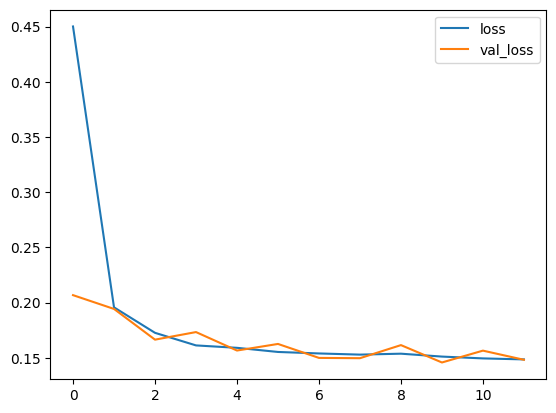

In [78]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()

In [80]:
model.evaluate(test_image_gen) # 95% accuracy

163/163 ━━━━━━━━━━━━━━━━━━━━ 9s 54ms/step - accuracy: 0.9399 - loss: 0.1441


[0.14500440657138824, 0.9480769038200378]

In [82]:
pred = model.predict(test_image_gen) # predictions
predictions = pred > 0.5 # if the prediction is greater than 0.5, it's uninfected, otherwise it's parasitized
print(predictions)

163/163 ━━━━━━━━━━━━━━━━━━━━ 9s 54ms/step
[[False]
 [False]
 [False]
 ...
 [ True]
 [ True]
 [ True]]


In [83]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(test_image_gen.classes, predictions)) # very good results

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1300
           1       0.95      0.96      0.95      1300

    accuracy                           0.95      2600
   macro avg       0.95      0.95      0.95      2600
weighted avg       0.95      0.95      0.95      2600



In [85]:
from tensorflow.keras.preprocessing import image

In [87]:
para_cell_path = test_path+'/parasitized/'+os.listdir(test_path+'/parasitized')[0]
my_image = image.load_img(para_cell_path, target_size=image_shape) # load the image

In [88]:
my_image_array = image.img_to_array(my_image) # convert the image to an array

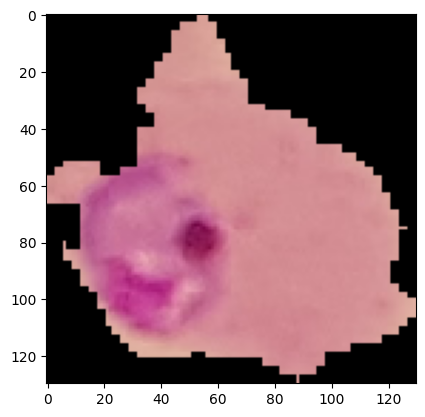

In [91]:
plt.imshow(my_image) # show the image

In [ ]:
model.predict(my_image_array.reshape(1,130,130,3)) # predict the image, it's parasitized

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


array([[0.]], dtype=float32)

In [92]:
train_image_gen.class_indices # parasitized is 0, uninfected is 1

{'parasitized': 0, 'uninfected': 1}